In [1]:
import open3d as o3d 
from typing import Tuple
from sklearn.neighbors import KDTree
import trimesh
import utils.implicit_waterproofing as iw
import numpy as np 
import matplotlib.pyplot as plt
!pip install ipympl
%matplotlib ipympl


def voxelize(pc, res, bounds=(-1., 1.), save_path=None):
    grid_points = iw.create_grid_points_from_bounds(bounds[0], bounds[1], res)
    occupancies = np.zeros(len(grid_points), dtype=np.int8)
    kdtree = KDTree(grid_points)
    _, idx = kdtree.query(pc)
    occupancies[idx] = 1

    if save_path is not None:
        compressed_occupancies = np.packbits(occupancies)
        if not exists(save_path):
            os.makedirs(save_path)
        np.savez(save_path, point_cloud=pc, compressed_occupancies=compressed_occupancies, bb_min=bounds[0],
                 bb_max=bounds[1], res=res)

    return occupancies


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


<frozen importlib._bootstrap>:219: RuntimeWarning: compiletime version 3.6 of module 'utils.libs.libmesh.triangle_hash' does not match runtime version 3.8
<frozen importlib._bootstrap>:219: RuntimeWarning: builtins.type size changed, may indicate binary incompatibility. Expected 864 from C header, got 880 from PyObject


In [2]:
import glob

files = glob.glob('/home/ubutnu/Documents/Projects/CorsoDeep/faust_ply/*.ply')

voxels_list = []
for f in files:
  o = o3d.io.read_point_cloud('/home/ubutnu/Documents/Projects/CorsoDeep/faust_ply/tr_reg_009.ply')
  voxels = voxelize(np.asarray(o.points), 30)
  voxels = voxels.reshape((30,30,30))  
  voxels_list.append(voxels) 

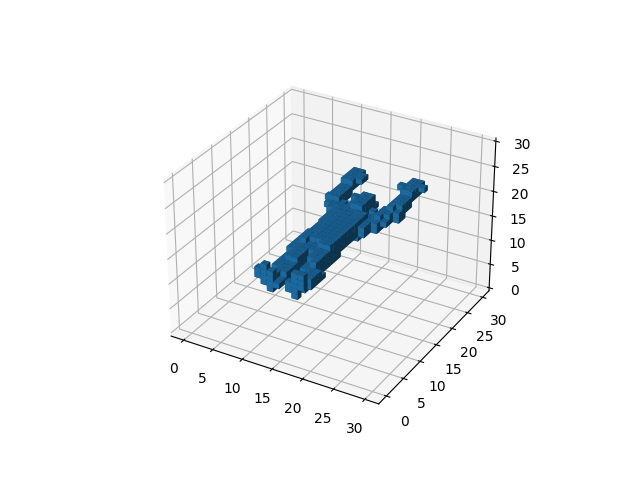

In [3]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxels)
plt.show() 
 
  